In [6]:
%set graph_format svg

In [1]:
clear all
cd "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017"

use board_endow_donation_directory_20181221, clear
quietly drop if top30private!=1 & top30public!=1
quietly drop if pctnonfinance==.
quietly drop if year>1999 & year<2003
quietly replace pctfinall=pctfinall*100



/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oliga
> rchy/Data/Boards 2000 to 2017







In [2]:
gen typeyear2=1 if top30public==1 & year>2002 & year<2010
replace typeyear2=3 if top30private==1 & year>2002 & year<2010
replace typeyear2=2 if top30public==1 & year>2010 & year<2018
replace typeyear2=4 if top30private==1 & year>2010 & year<2018
label define typeyear2 1 "Public 2003-2010" 3 "Private 2003-2010" ///
2 "Public 2011-2017" 4 "Private 2011-2017"
label val typeyear2 typeyear2


(702 missing values generated)

(200 real changes made)

(210 real changes made)

(210 real changes made)










----------------------------------------------------------------------------------------
                              (1)              (2)              (3)              (4)    
                     % trustees~a     % trustees~a     % trustees~a     % trustees~a    
                             b/se             b/se             b/se             b/se    
----------------------------------------------------------------------------------------
Acceptance rate            -0.096 ^         -0.054 *         -0.105 *         -0.263 *  
                            0.053            0.026            0.044            0.104    
year=2003                   0.000                             0.000                     
                                .                                 .                     
year=2004                  -0.183                             0.960                     
                            0.691                             0.695                     
year=2005      

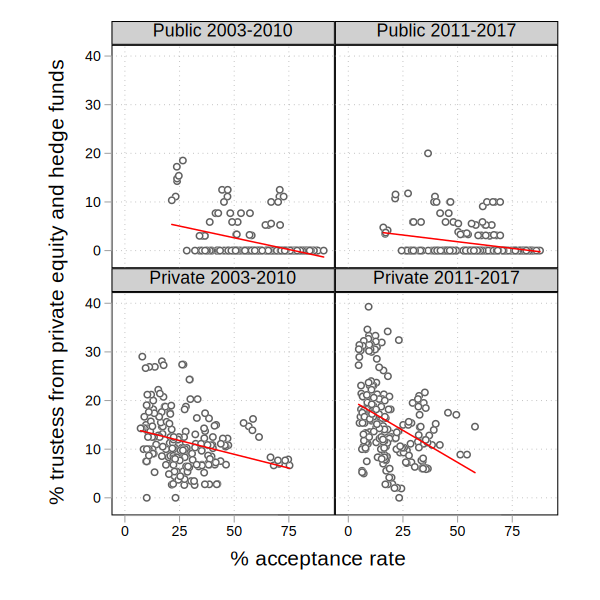

In [7]:
set line 150
set scheme plotplain
est clear
forval typeyear2 = 1/4 {
quietly regress pctalt acceptrate i.year if typeyear2==`typeyear2', cluster(unitid)
eststo est`typeyear2'
}
esttab est* , type cells(b(star fmt(3)) se(fmt(3))) stardetach  ///
	legend label varlabels(_cons Constant)  stats(r2 N, fmt(3 0 0) ///
	label(R-square N)) starlevels(^ .1 * .05 ** .01 *** .001) 

est clear
forval typeyear2 = 1/4 {
quietly regress pctfinall acceptrate i.year if typeyear2==`typeyear2', cluster(unitid)
eststo est`typeyear2'
}
esttab est* , type cells(b(star fmt(3)) se(fmt(3))) stardetach  ///
	legend label varlabels(_cons Constant)  stats(r2 N, fmt(3 0 0) ///
	label(R-square N)) starlevels(^ .1 * .05 ** .01 *** .001) 

tw (scatter pctalt acceptrate, msym(O) mfc(white)) ///
	(lfit pctalt acceptrate, sort lp(l) lc(red)), /// 
		by(typeyear2, compact row(2) legend(off) note("")) ///
		ytitle("% trustess from private equity and hedge funds") ///
		xtitle("% acceptance rate") ///
		xlab(0(25)70) ylab(0(10)40) yscale(range(-1 40)) xscale(range(-1 50)) ///
		xsize(4) aspect(1) name(alt_accep, replace) 



Linear regression                               Number of obs     =        827
                                                F(7, 59)          =      21.40
                                                Prob > F          =     0.0000
                                                R-squared         =     0.6048
                                                Root MSE          =     5.2429

                                          (Std. Err. adjusted for 60 clusters in unitid)
----------------------------------------------------------------------------------------
                       |               Robust
                pctalt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
             typeyear2 |
     Public 2011-2017  |  -2.883172    3.11187    -0.93   0.358    -9.110009    3.343665
    Private 2003-2010  |   6.082301   3.908355     1.56   0.125    -1.738298     13.90

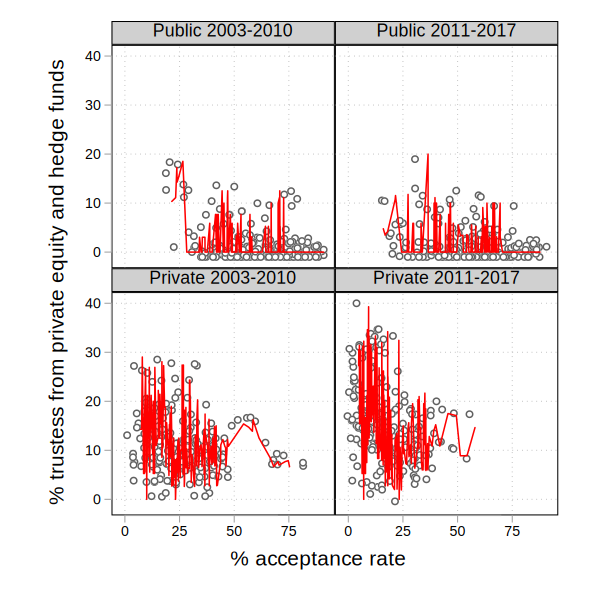

In [18]:
reg pctalt typeyear2##c.acceptrate, cluster(unitid) ro
testparm typeyear2##c.acceptrate 
*reg low spend_ugdtuit_low i.HGroup, cluster(stabbr) ro
predict ppctalt2 if e(sample)

tw (scatter pctalt acceptrate , msym(O) mfc(white) jitter(5)) ///
	(line pctalt acceptrate , sort lp(l) lc(red)), ///
		by(typeyear2, compact row(2) legend(off) note("")) ///
		ytitle("% trustess from private equity and hedge funds") ///
		xtitle("% acceptance rate") ///
		xlab(0(25)70) ylab(0(10)40) yscale(range(-1 40)) xscale(range(-1 50)) ///
		xsize(4) aspect(1) name(alt_accep, replace) 